In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('/train.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [7]:
# Remember it is an iterative process

#Column Types
`Numerical` - Age,Fare,PassengerId

`Categorical` - Survived, Pclass, Sex, SibSp, Parch,Embarked

`Mixed`- Name, Ticket, Cabin

#Univariate Analysis
Univariate analysis focuses on analyzing each feature in the dataset independently.

Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values


The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

`Normal Distribution`: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

`Skewed Distribution`: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

`Bimodal Distribution`: A distribution with two peaks or modes.

`Uniform Distribution`: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

`dispersion` is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.
There are several measures of dispersion, including:

Range: The difference between the largest and smallest values in a data set.

Variance: The average of the squared deviations of each value from the mean of the data set.

Standard Deviation: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

Interquartile range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

`Steps of doing Univariate Analysis` on Numerical columns

`Descriptive Statistics`: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

`Visualizations`: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

`Identifying Outliers`: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

`Skewness`: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

`Conclusion`: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

# Age

*`conclusions`
- age is normally(almost) distributed.
-20% values are missing.
-

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

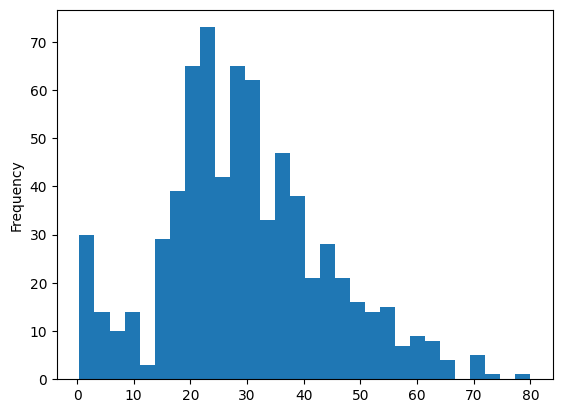

In [9]:
df['Age'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

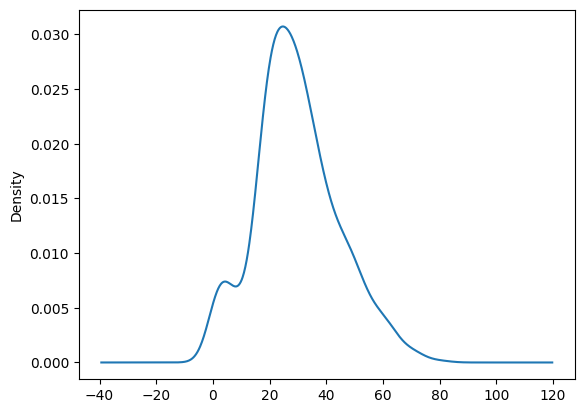

In [10]:
df['Age'].plot(kind='kde')

In [11]:
df['Age'].skew()

0.38910778230082704

<Axes: >

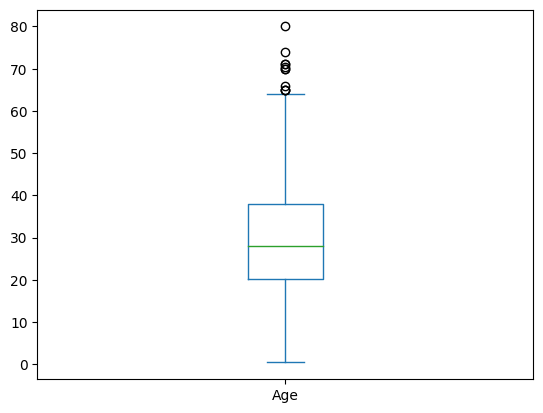

In [12]:
df['Age'].plot(kind='box')

<Axes: ylabel='Age'>

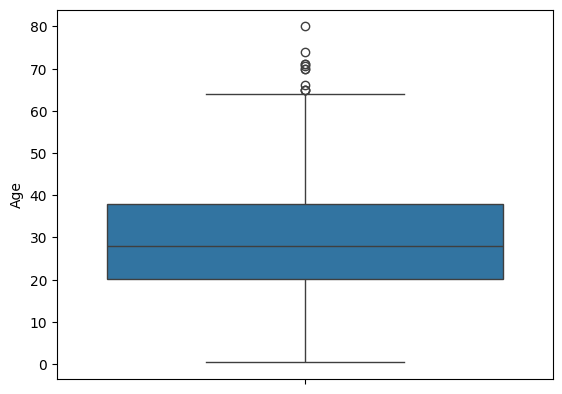

In [13]:
sns.boxplot(df.Age)

In [14]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [15]:
df['Age'].isnull().sum()/len(df['Age']) * 100

19.865319865319865

#Fare

`conclusions`

-data is highly skewed(positively)
- Fare column actually contains group Fare values and not individual data(this might be a problem)
- we have to create a individual Fare column.

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

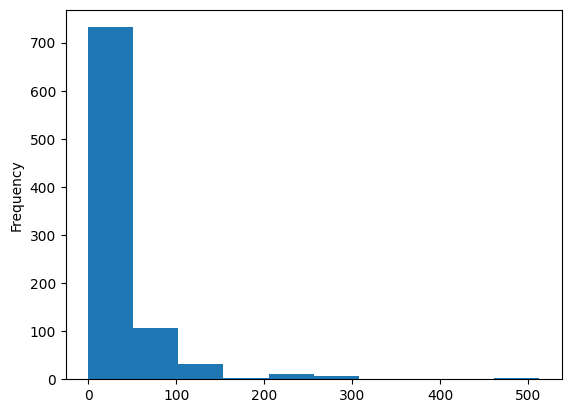

In [17]:
df['Fare'].plot(kind='hist',bins=10)

<Axes: ylabel='Density'>

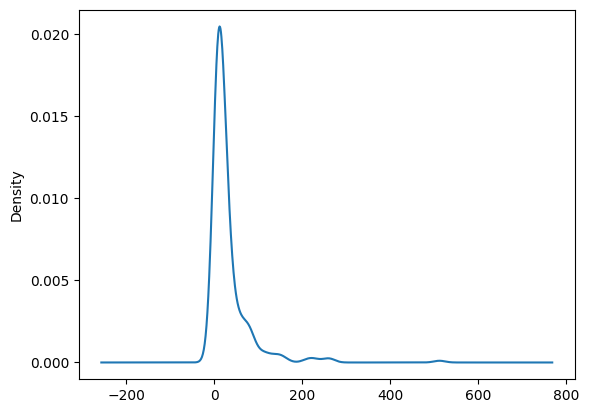

In [18]:
df['Fare'].plot(kind='kde')

In [19]:
df['Fare'].skew()

4.787316519674893

<Axes: ylabel='Fare'>

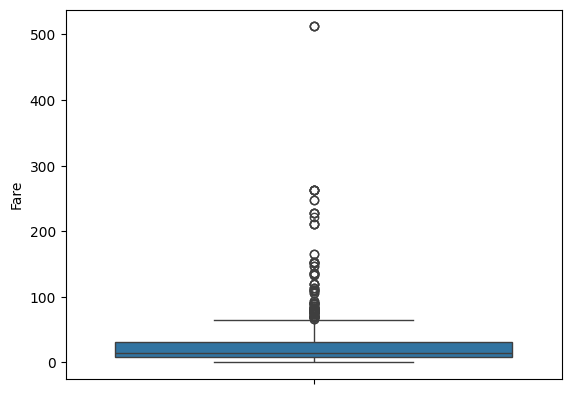

In [20]:
sns.boxplot(df.Fare)

In [21]:
df[df['Fare']>200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [22]:
df['Fare'].isnull().sum()

0

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#	Survived
`conclusion`

- more than 60% of peaple in the titanic could not sirvived this fatal accident.



In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

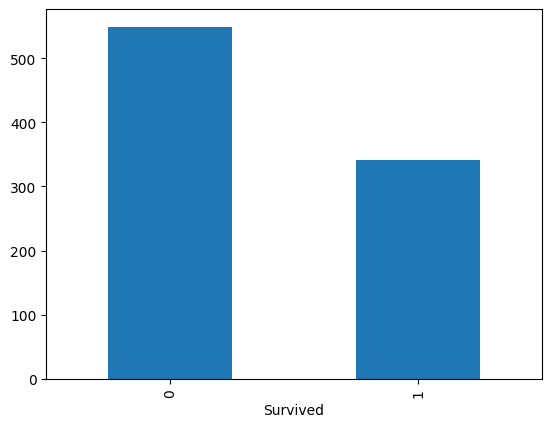

In [24]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

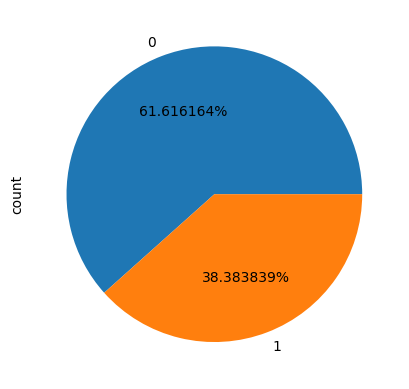

In [25]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.6f%%')

In [26]:
df['Survived'].isnull().sum()

0

#Pclass
`conclusion`

-its suprising that no. of passenger in 2nd class is least then ist class.

In [27]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

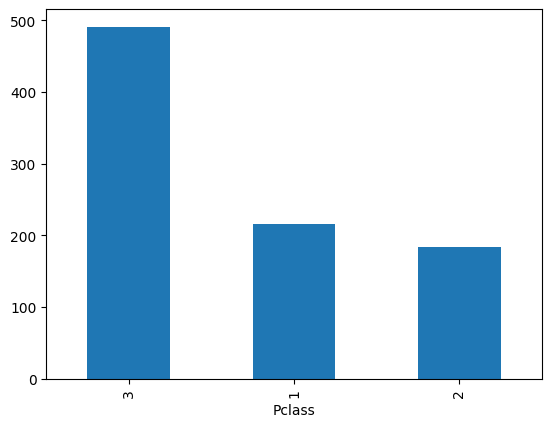

In [28]:
df['Pclass'].value_counts().plot(kind='bar')

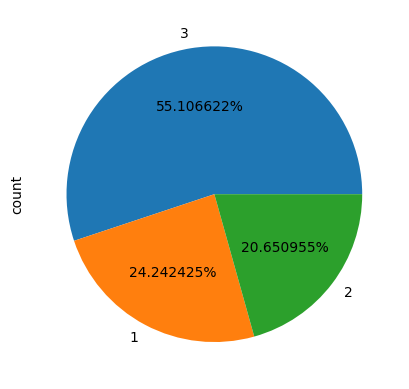

In [29]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.6f%%')
plt.show()

#SEX
`conclusion`

- it look normal generally counts of male in most scenarios is greater then women.

In [30]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

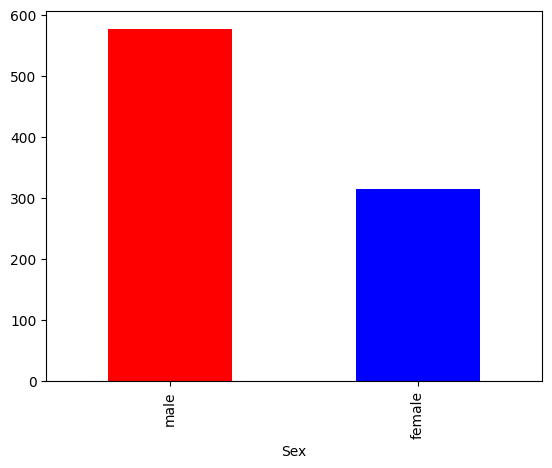

In [31]:
colours=['red','blue']
df['Sex'].value_counts().plot(kind='bar',color=colours)

<Axes: ylabel='count'>

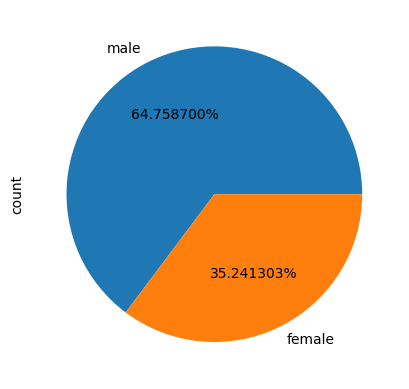

In [32]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.6f%%')

In [33]:
df['Sex'].isnull().sum()

0

#sibsp
`conclusion`

-over 60% of the passenger are travelling alone.

In [34]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

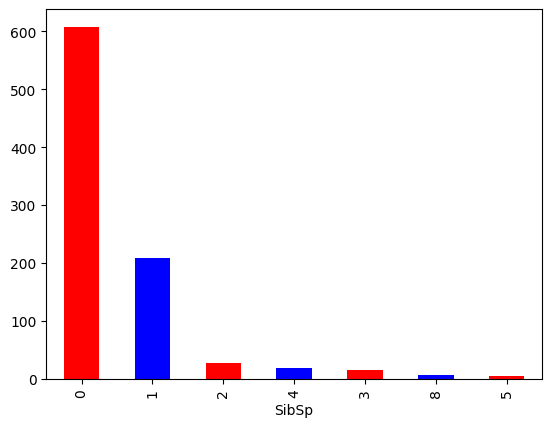

In [35]:
df['SibSp'].value_counts().plot(kind='bar',color=colours)


<Axes: ylabel='count'>

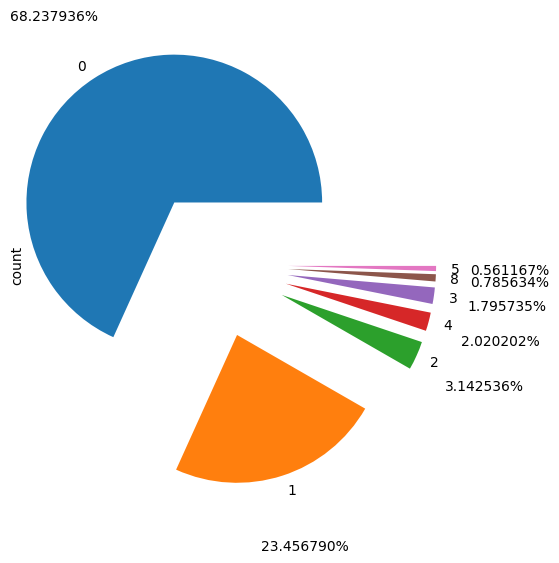

In [36]:
explode=[0.5,0.5,0.5,0.5,0.5,0.5,0.5]
df['SibSp'].value_counts().plot(kind='pie',autopct='%.6f%%',pctdistance=1.5,explode=explode)

In [37]:
df['SibSp'].isnull().sum()

0

#parch
`conclusion`
- siblings and parents columns can be merge to one column `family_size` allthough the have same data about no of family member travelling.

- create a column is alone.

- over 75% of the passenger are travelling without there parents.

In [38]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

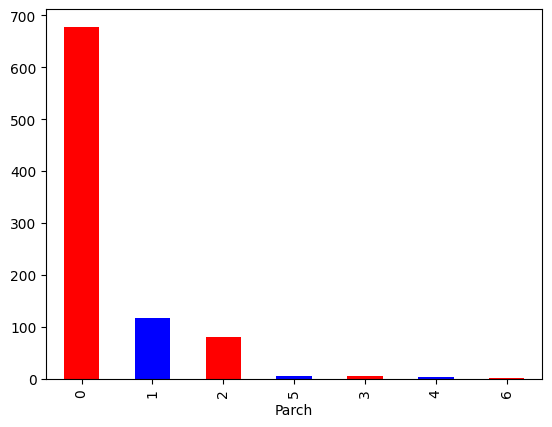

In [39]:
df['Parch'].value_counts().plot(kind='bar',color=colours)

<Axes: ylabel='count'>

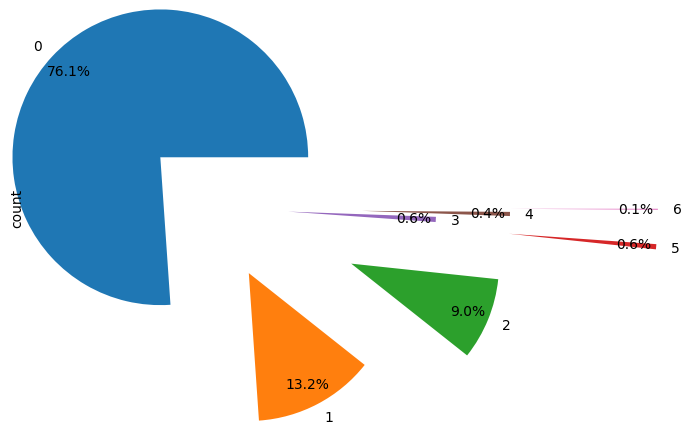

In [40]:
explode=[0.5,0.5,1,2,0.5,1,2]
df['Parch'].value_counts().plot(kind='pie',autopct='%.1f%%',pctdistance=0.85,explode=explode)


In [41]:

df['Parch'].isnull().sum()

0

#Embarked
`conclusion`

- most of the passenger board from southhamton(england).
- Embarked have 2 mising values.

In [42]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

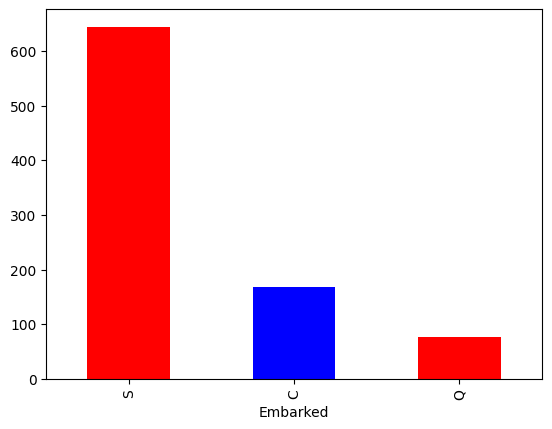

In [43]:
df['Embarked'].value_counts().plot(kind='bar',color=colours)

<Axes: ylabel='count'>

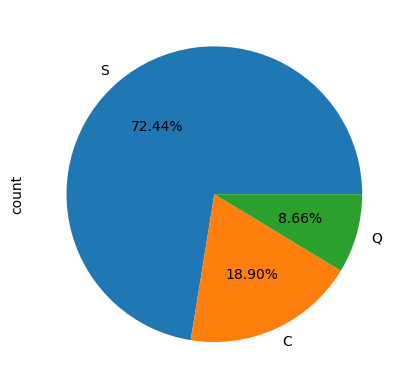

In [44]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [45]:
df['Embarked'].isnull().sum()

2

# univariate analysis on mixed type column can be done if you can convert it to category type columns.

#Steps of doing Bivariate Analysis
#Select 2 cols

Understand type of relationship

`Numerical - Numerical`
a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots

b. Check correlation coefficent to check linear relationship

`Numerical - Categorical` - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.

a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

`Categorical - Categorical`
a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.

b. You can plots like heatmap, stacked barplots, treemaps.

In [46]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# how can we do bivariate analysis in categorical data

#`conclusion`

- 3rd class is the most dangerous class over 75% of passenger died who belongs to pclass '3' and asusual pclass '1' is safest over 60% of the passenger are alived after the tragic accident.
-survival rate of women is much much greater than men in this tragic.
- majority of  passenger boarded from Embarked 'C' are from Pclass '1' and hense there survival rate is higher.



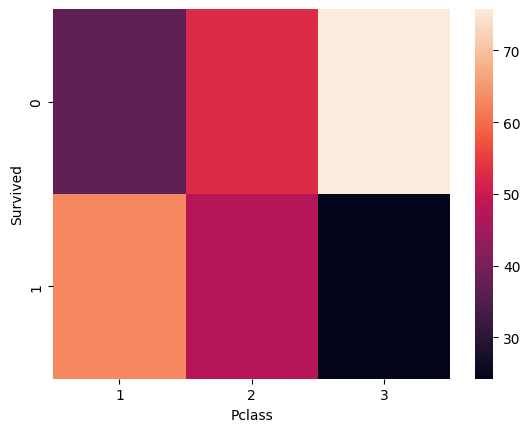

In [53]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)
plt.show()

In [47]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [54]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [56]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [57]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [58]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


#how can we do bivariate analysis in category and numeric columns.

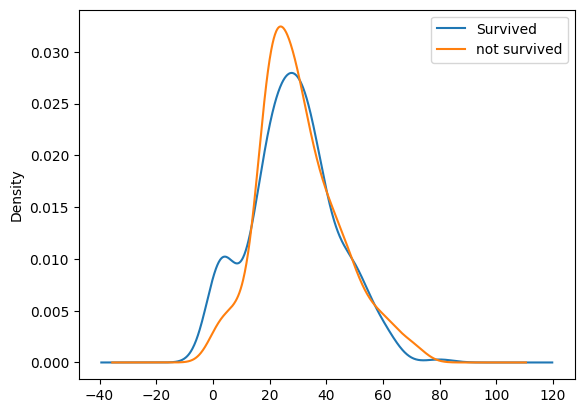

In [62]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='not survived')
plt.legend()
plt.show()

In [63]:
df[df['Pclass']==1]['Age'].mean()

38.233440860215055

In [64]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [65]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [67]:
df1=pd.read_csv('/test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [198]:
df2=pd.concat([df,df1])
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,"Braund,"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,"Cumings,"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"Heikkinen,"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,"Futrelle,"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,"Allen,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN


In [199]:
df2[df2['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,11.0,"Sage,"
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,NaN


In [200]:
df2['ind_Fare']=df2['Fare']/(df2['SibSp']+df2['Parch']+1)

In [201]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname,ind_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,"Braund,",3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,"Cumings,",35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"Heikkinen,",7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,"Futrelle,",26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,"Allen,",8.05000


<Axes: >

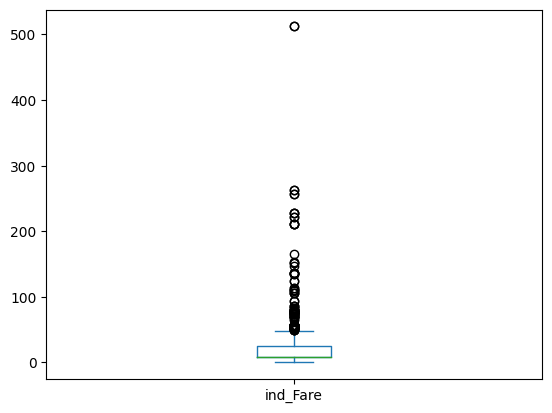

In [202]:
df2['ind_Fare'].plot(kind='box')

<Axes: ylabel='ind_Fare'>

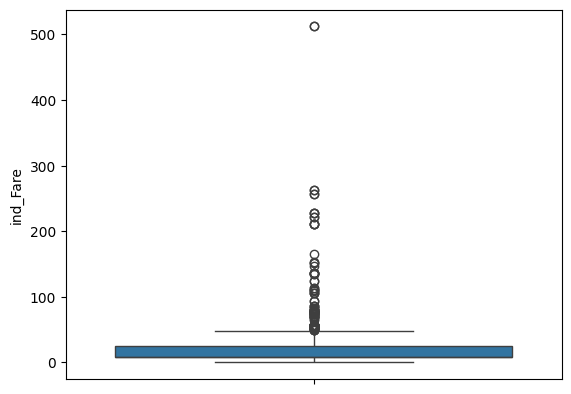

In [203]:
sns.boxplot(df2.ind_Fare)

In [204]:
df2['family_size']=df2['SibSp']+df2['Parch']+1

In [205]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname,ind_Fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,"Braund,",3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,"Cumings,",35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"Heikkinen,",7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,"Futrelle,",26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,"Allen,",8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,8.050000,1


In [206]:
def transform_family_size(num):
  if num==1:
    return 'alone'
  elif 2<=num<=4:
    return 'small_family'
  elif num >=5:
    return 'big_family'



In [207]:
df2['family_type']=df2['family_size'].apply(transform_family_size)

# `conclusion`
- if you were travelling as a small family in tatanic your chance survival willbe high as campare to big family or travelling alone.

In [208]:
pd.crosstab(df2['Survived'],df2['family_type'],normalize='columns')*100

family_type,alone,big_family,small_family
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


<Axes: xlabel='Survived'>

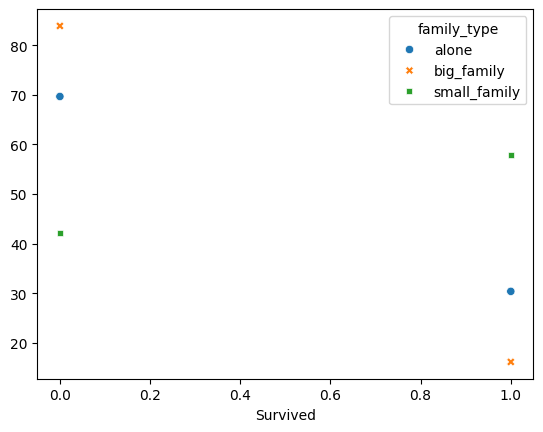

In [209]:
sns.scatterplot(pd.crosstab(df2['Survived'],df2['family_type'],normalize='columns')*100)

In [210]:
df2['surname'] = df2['Name'].str.split(',').str.get(0)

In [211]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname,ind_Fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,Braund,3.625000,2,small_family
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,Cumings,35.641650,2,small_family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Heikkinen,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,Futrelle,26.550000,2,small_family
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Allen,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,Spector,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,Oliva y Ocana,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,Saether,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,Ware,8.050000,1,alone


In [212]:
df2['title']=df2['Name'].str.split(',').str.get(1).str.strip().str.split( ).str.get(0)

In [213]:
df2['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [214]:
titles_to_replace = ['Rev.', 'Dr.', 'Col.', 'Major.', 'Capt.', 'the', 'Jonkheer.', 'Don.']
df2['title']=df2['title'].replace(titles_to_replace,'other',regex=True)

In [215]:
df2.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname,ind_Fare,family_size,family_type,title
868,869,0.0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1.0,van Melkebeke,9.5000,1,alone,Mr.
109,1001,NaN,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S,NaN,Swane,13.0000,1,alone,Mr.
658,659,0.0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,1.0,Eitemiller,13.0000,1,alone,Mr.
562,563,0.0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S,1.0,Norman,13.5000,1,alone,Mr.
177,178,0.0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,1.0,Isham,28.7125,1,alone,Miss.
325,326,1.0,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,1.0,Young,135.6333,1,alone,Miss.
844,845,0.0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,1.0,Culumovic,8.6625,1,alone,Mr.
675,676,0.0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S,1.0,Edvardsson,7.7750,1,alone,Mr.
477,478,0.0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,2.0,Braund,3.5229,2,small_family,Mr.
225,226,0.0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,1.0,Berglund,9.3500,1,alone,Mr.


In [216]:
temp_df=df2[df2['title']=='other']
temp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname,ind_Fare,family_size,family_type,title
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1.0,Uruchurtu,27.720800,1,alone,other
149,150,0.0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,1.0,Byles,13.000000,1,alone,other
150,151,0.0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,1.0,Bateman,12.525000,1,alone,other
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,3.0,Minahan,30.000000,3,small_family,other
249,250,0.0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,2.0,Carter,13.000000,2,small_family,other
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,1.0,Moraweck,14.000000,1,alone,other
398,399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,1.0,Pain,10.500000,1,alone,other
449,450,1.0,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,1.0,Peuchen,30.500000,1,alone,other
536,537,0.0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,1.0,Butt,26.550000,1,alone,other
626,627,0.0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q,1.0,Kirkland,12.350000,1,alone,other


#`conclusion`
- those who belong to other title have 30% survival rate.

In [217]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,other
Survived,
0.0,71.428571
1.0,28.571429


In [218]:
df2['Cabin'].isnull().sum()

1014

In [219]:
df2['Cabin'].fillna('M',inplace=True)

In [220]:
df2['Deck']=df2['Cabin'].str[0]

In [221]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_sixe,surname,ind_Fare,family_size,family_type,title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2.0,Braund,3.625000,2,small_family,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,Cumings,35.641650,2,small_family,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1.0,Heikkinen,7.925000,1,alone,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,Futrelle,26.550000,2,small_family,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1.0,Allen,8.050000,1,alone,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,NaN,Spector,8.050000,1,alone,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,Oliva y Ocana,108.900000,1,alone,other.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,NaN,Saether,7.250000,1,alone,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,NaN,Ware,8.050000,1,alone,Mr.,M


In [222]:
pd.crosstab(df2['Deck'],df2['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


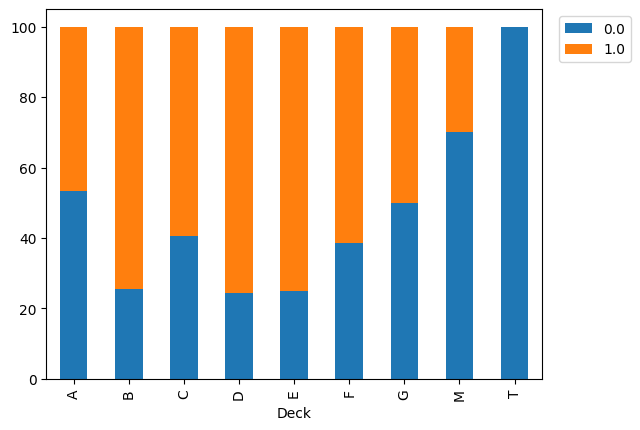

In [223]:
(pd.crosstab(df2['Deck'],df2['Survived'],normalize='index')*100).plot(kind='bar',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))


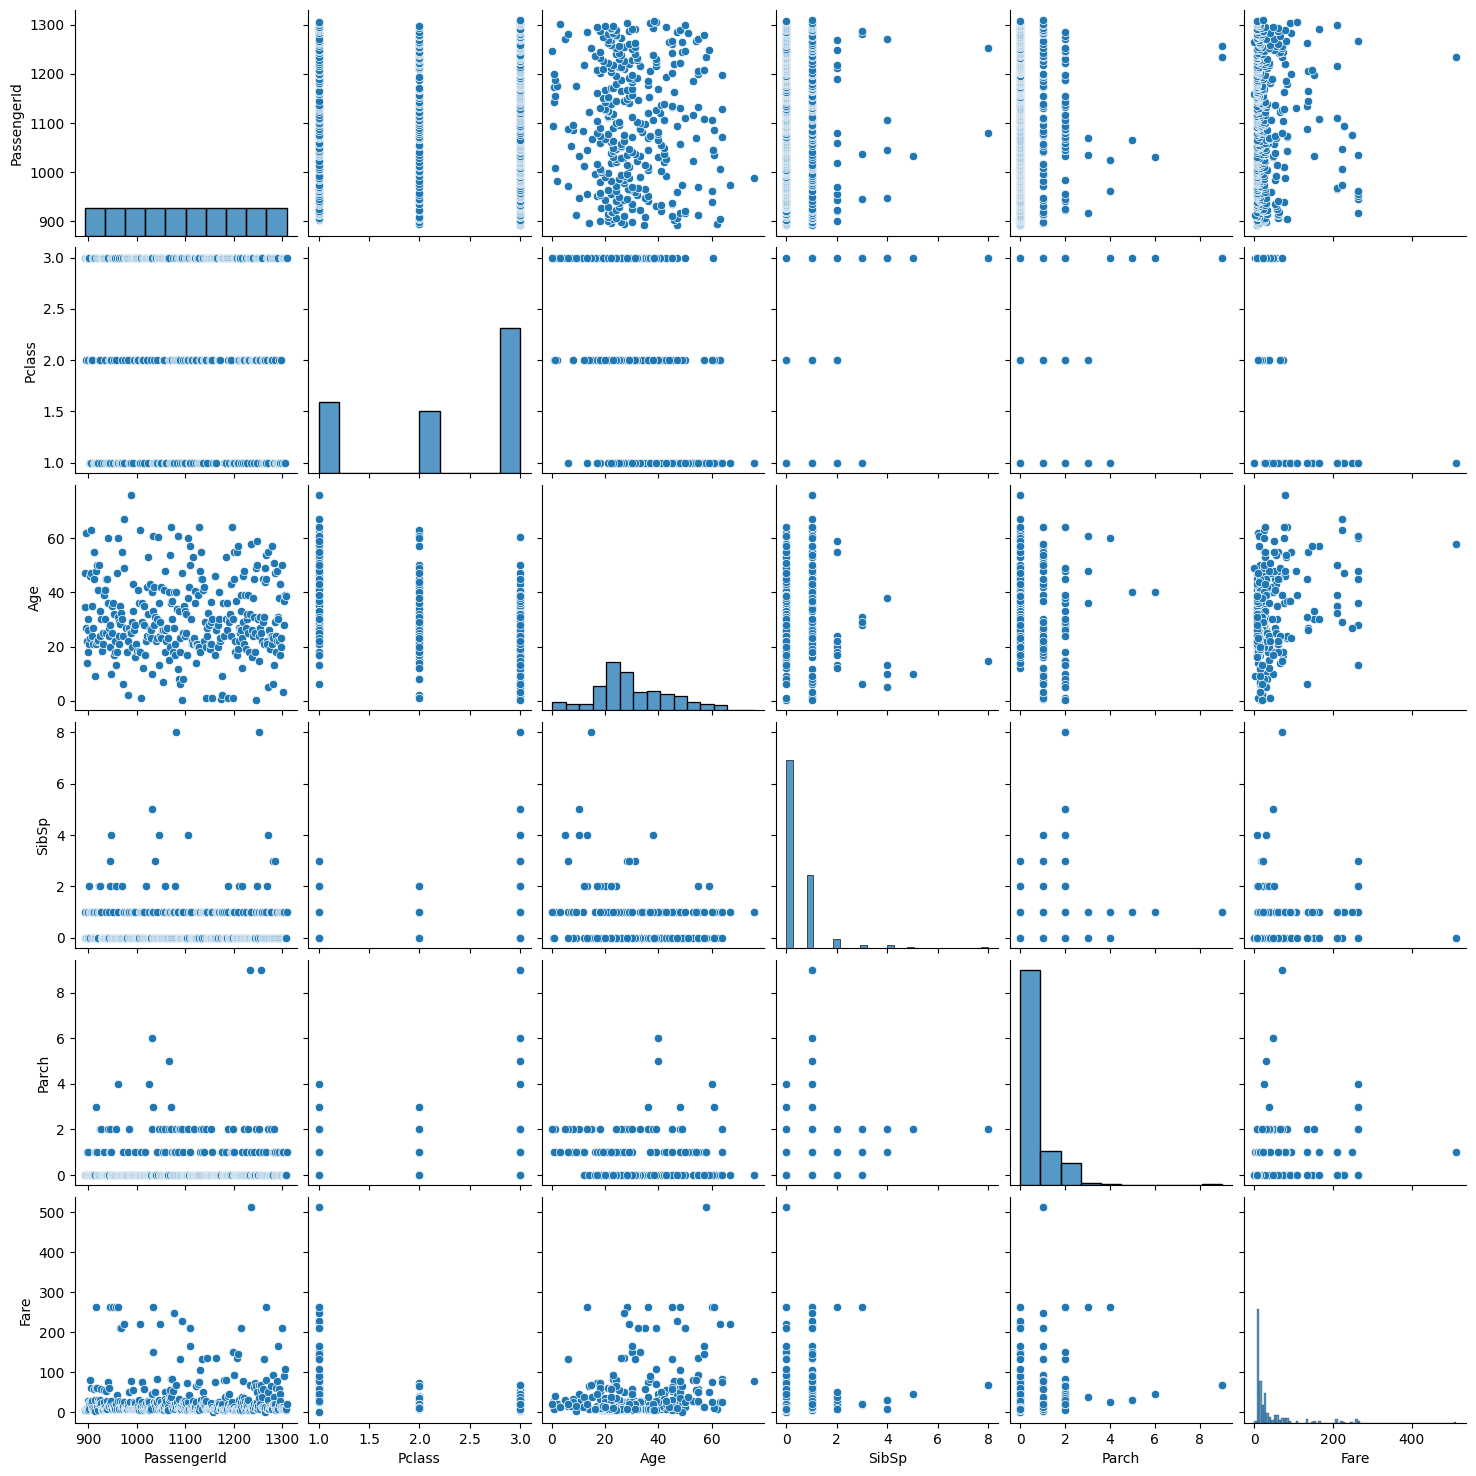

In [225]:
sns.pairplot(df1)